<a href="https://colab.research.google.com/github/brash99/Phys202L/blob/main/Lorentz_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6:  Lorentz Force

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Determining the Relationship Between Magnetic Field and Current

In [2]:
# Create a Pandas DataFrame with data for part 1

# The data elements are [i, di, B, dB]

data1 = [[0.20,0.01,0.006868,0.00010], [0.40,0.01,0.005995,0.00010], 
         [0.60,0.01,0.005163,0.00010], [0.80,0.01,0.004307,0.00010], 
         [1.00,0.01,0.003463,0.00010], [1.20,0.01,0.002611,0.00010],
         [1.40,0.01,0.001765,0.00010], [1.60,0.01,0.000926,0.00010], 
         [1.80,0.01,0.0000679,0.00010]]
# create dataframe
df1 = pd.DataFrame(data1, columns = ['i', 'di','B','dB'])

print('Helmholtz Coil Calibration:')
print(df1.to_string(index=False))

Helmholtz Coil Calibration:
  i   di        B     dB
0.2 0.01 0.006868 0.0001
0.4 0.01 0.005995 0.0001
0.6 0.01 0.005163 0.0001
0.8 0.01 0.004307 0.0001
1.0 0.01 0.003463 0.0001
1.2 0.01 0.002611 0.0001
1.4 0.01 0.001765 0.0001
1.6 0.01 0.000926 0.0001
1.8 0.01 0.000068 0.0001


Beta: [-0.00424162  0.0077045 ]
Beta Std Error: [4.98332387e-06 5.60854583e-06]
Beta Covariance: [[ 4.91630805e-09 -4.91630804e-09]
 [-4.91630804e-09  6.22732321e-09]]
Residual Variance: 0.00505125320889706
Inverse Condition #: 0.039157016811716745
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (-0.0042 +/- 0.0000)X + (0.007705 +/- 0.000006)


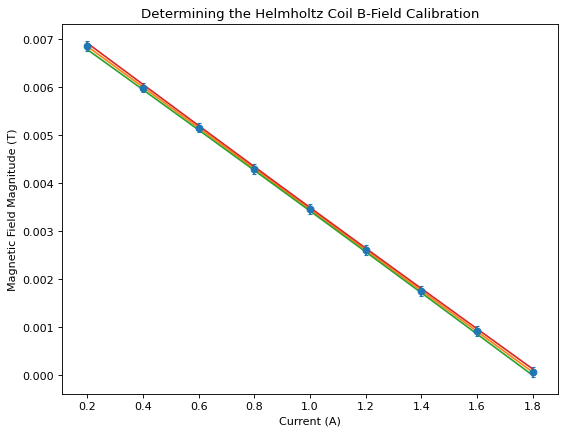

In [3]:
xi = df1['i']
yi = df1['B']
sigmaxi = df1['di']
sigmayi = df1['dB']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = mx + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[0.05, 0.00]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.4f +/- %0.4f)X + (%0.6f +/- %0.6f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xl,middle)
plt.plot(xl,lower)
plt.plot(xl,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Magnetic Field Magnitude (T)')
plt.title('Determining the Helmholtz Coil B-Field Calibration')
plt.show()

gamma = np.abs(popt[0])
dgamma = np.abs(perr[0])


## Calibration of Electric Field Plates - Determining d_eff

In [4]:
# Create a Pandas DataFrame with data for part 2

# The data elements are [Vp, dVp, y, dy]

data2 = [[540.0,10.0,0.005,0.0010], [980.0,10.0,0.010,0.0010], 
         [1410.0,10.0,0.015,0.0010], [1830.0,10.0,0.020,0.0010]]
# create dataframe
df2 = pd.DataFrame(data2, columns = ['Vp', 'dVp','y','dy'])



print('Electric Field Calibration:')
print(df2.to_string(index=False))

Electric Field Calibration:
    Vp  dVp     y    dy
 540.0 10.0 0.005 0.001
 980.0 10.0 0.010 0.001
1410.0 10.0 0.015 0.001
1830.0 10.0 0.020 0.001


Beta: [ 1.16266661e-05 -1.33573267e-03]
Beta Std Error: [8.55039884e-08 1.09740309e-04]
Beta Covariance: [[ 1.09617034e-12 -1.30444297e-09]
 [-1.30444297e-09  1.80566701e-06]]
Residual Variance: 0.006669521818914426
Inverse Condition #: 0.000291742793930828
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (0.000011627 +/- 0.000000086)X + (-0.001335733 +/- 0.000109740)


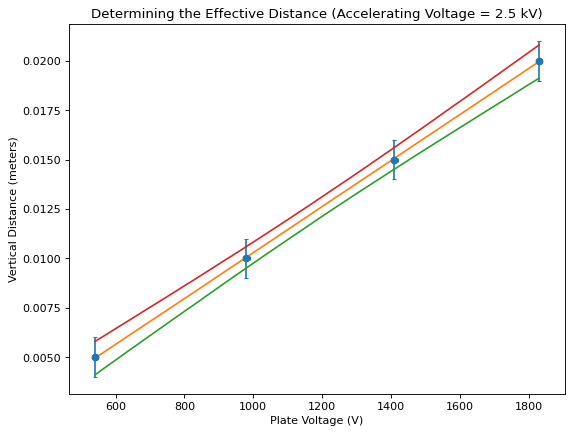

In [5]:
xi = df2['Vp']
yi = df2['y']
sigmaxi = df2['dVp']
sigmayi = df2['dy']

##############################

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Non-Linear function y = a*(x-c)^b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[2.1, 2.0]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f)X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xl,middle)
plt.plot(xl,lower)
plt.plot(xl,upper)

#########################

plt.xlabel('Plate Voltage (V)')
plt.ylabel('Vertical Distance (meters)')
plt.title('Determining the Effective Distance (Accelerating Voltage = 2.5 kV)')
plt.show()

In [6]:
Va = 2500.0
dVa = 10.0

x = 0.10
dx = 0.001

C = popt[0]
dC = perr[0]

deff = x**2/(4*C*Va)

ddeff = deff*(dVa/Va+2.0*dx/x+dC/C)

print('d$_{eff}$ = (%0.4f +/- %0.4f)' % (deff,ddeff))

d$_{eff}$ = (0.0860 +/- 0.0027)


In [7]:
from io import DEFAULT_BUFFER_SIZE
# Create a Pandas DataFrame with data for part 2

# The data elements are [Vp, dVp, i, di]

data3 = [[600.0,10.0,0.05,0.0010], [1150.0,10.0,0.10,0.0010], 
         [1560.0,10.0,0.15,0.0010], [1880.0,10.0,0.20,0.0010], [2200,10,0.25,.0010]]

# create dataframe
df3 = pd.DataFrame(data3, columns = ['Vp', 'dVp','i','di'])

df3['B'] = gamma*df3['i']
df3['dB'] = df3['B']*(dgamma/gamma+df3['di']/df3['i'])

df3['E'] = df3['Vp']/deff
df3['dE'] = df3['E']*(ddeff/deff+df3['dVp']/df3['Vp'])

print('Velocity Selector:')
print(df3.to_string(index=False))

Velocity Selector:
    Vp  dVp    i    di        B       dB            E         dE
 600.0 10.0 0.05 0.001 0.000212 0.000004  6975.999671 334.993046
1150.0 10.0 0.10 0.001 0.000424 0.000005 13370.666036 535.492233
1560.0 10.0 0.15 0.001 0.000636 0.000005 18137.599145 684.955263
1880.0 10.0 0.20 0.001 0.000848 0.000005 21858.132303 801.609335
2200.0 10.0 0.25 0.001 0.001060 0.000005 25578.665461 918.263407


Beta: [2.30638306e+07 2.52096116e+03]
Beta Std Error: [1.62396405e+06 8.26876217e+02]
Beta Covariance: [[ 8.27689157e+11 -3.55866961e+08]
 [-3.55866961e+08  2.14583065e+05]]
Residual Variance: 3.1862918868740855
Inverse Condition #: 0.00027271436283187985
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (23063830.5866 +/- 1623964.0534)X + (2520.9612 +/- 826.8762)


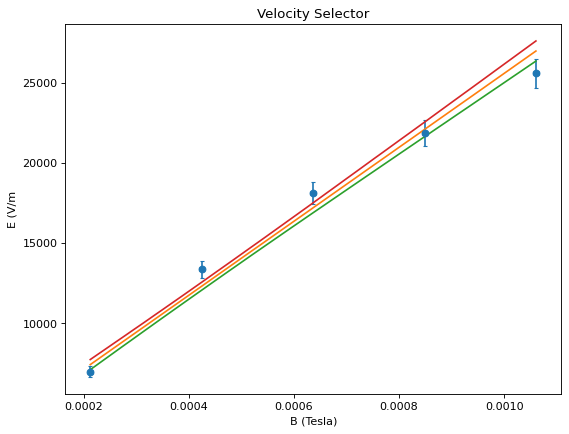

In [8]:
xi = df3['B']
yi = df3['E']
sigmaxi = df3['dB']
sigmayi = df3['dE']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Non-Linear function y = a*(x-c)^b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[2.11, 2.0]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.4f +/- %0.4f)X + (%0.4f +/- %0.4f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xl,middle)
plt.plot(xl,lower)
plt.plot(xl,upper)

#########################

plt.xlabel('B (Tesla)')
plt.ylabel('E (V/m')
plt.title('Velocity Selector')
plt.show()

In [9]:
Va = 2500.00
dVa = 10.00

q = 1.602E-19
m = 9.11E-31

v_expected = np.sqrt(2.0*q*Va/m)

print(v_expected)


29652210.162283562
